In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline 

In [77]:
vf_data=pd.read_csv('VF_Data2.csv')
vf_data.head(15)

,Season,Matchday,HomeTeam,AwayTeam,1stScore,HTR,FTR,HTHG,HTAG,FTHG,FTAG
0,2032680,1,1,12,1,1,1,1,0,1,0
1,2032680,1,2,16,2,3,3,0,1,1,1
2,2032680,1,3,11,2,2,3,0,1,1,1
3,2032680,1,4,9,3,3,3,0,0,0,0
4,2032680,1,5,14,2,3,2,0,1,2,3
5,2032680,1,6,10,1,1,1,3,0,5,1
6,2032680,1,7,13,1,1,1,1,0,3,1
7,2032680,1,8,15,3,3,3,0,0,0,0
8,2032680,2,9,7,1,3,1,1,1,2,1
9,2032680,2,10,5,1,1,1,3,0,6,0


## Data Analysis

<AxesSubplot:xlabel='FTR', ylabel='count'>

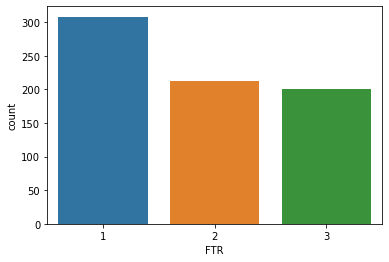

In [78]:
sns.countplot(x='FTR',data=vf_data)

## Data Wrangling

In [88]:
vf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Season    720 non-null    int64
 1   Matchday  720 non-null    int64
 2   HomeTeam  720 non-null    int64
 3   AwayTeam  720 non-null    int64
 4   1stScore  720 non-null    int64
 5   HTR       720 non-null    int64
 6   FTR       720 non-null    int64
 7   HTHG      720 non-null    int64
 8   HTAG      720 non-null    int64
 9   FTHG      720 non-null    int64
 10  FTAG      720 non-null    int64
dtypes: int64(11)
memory usage: 62.0 KB


In [89]:
vf_data.isnull()

,Season,Matchday,HomeTeam,AwayTeam,1stScore,HTR,FTR,HTHG,HTAG,FTHG,FTAG
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
715,False,False,False,False,False,False,False,False,False,False,False
716,False,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False,False


## Dataset Training

In [79]:
X=vf_data.drop('FTR',axis=1)
y=vf_data['FTR']

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=1)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
model=LogisticRegression()

In [147]:
model.fit(X_train, y_train)

LogisticRegression()

In [148]:
predictions=model.predict(X_test)

## Model Performance

In [149]:
from sklearn.metrics import classification_report

In [156]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.51      1.00      0.68        37\n           2       0.00      0.00      0.00        15\n           3       0.00      0.00      0.00        20\n\n    accuracy                           0.51        72\n   macro avg       0.17      0.33      0.23        72\nweighted avg       0.26      0.51      0.35        72\n'

In [143]:
#Accuracy calculation
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test,predictions)

array([[37,  0,  0],
       [15,  0,  0],
       [20,  0,  0]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score 

In [135]:
accuracy_score(y_test,predictions)

0.5138888888888888